<a href="https://colab.research.google.com/github/sre-glitch/UBER_SUPPLY_DEMAND/blob/main/Uber_Supply_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name:**
## Uber Supply Demand Gap
Done by: Sreya Tulasi Kolasani

# **Project Summary:**
This project involves analyzing Uber ride request data to identify patterns and operational challenges such as trip cancellations and supply-demand gaps. The dataset includes fields like request ID, pickup point, driver ID, status, and timestamps for both request and drop. After cleaning the data by handling missing values and converting timestamps to datetime format in excel, new features such as hour, weekday, and month were extracted to enable deeper analysis. Visualizations were used to explore the distribution of trip statuses, the relationship between pickup points and trip outcomes, and how these vary by hour. The analysis revealed significant trends, such as a high number of cancellations during early morning hours from the city and a spike in unavailability of cars during evening hours at the airport, indicating clear time-based and location-based service gaps. Python libraries such as Pandas, Seaborn, and Matplotlib were used throughout for data manipulation and visualization. We used SQL via the pandasql library to extract data-driven insights from the cleaned Uber request dataset. Instead of filtering or grouping the data using pandas alone, SQL allowed us to write intuitive and readable queries.

# **Problem Statement:**
Analyze Uber ride request data to identify key issues affecting service efficiency, such as high cancellation rates and demand-supply mismatches, by leveraging data cleaning in Excel, querying in SQL, and in-depth exploratory analysis in Python.

# **Project:**

**Set up environment:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

**Upload and load dataset:**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Uber Request Data.csv to Uber Request Data (1).csv


Load it into a DataFrame:

In [ ]:
df = pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Date,Request hour,Day,Drop timestamp,Date.1,Hour,Day.1,Status.1,Count,Pickup Point,Count.1
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 00:00,11-01-1900 00:00,Monday,11-07-2016 13:00,11-07-2016 00:00,00-01-1900 13:00,Monday,Trip Completed,2831.0,Airport,3238.0
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 00:00,17-01-1900 00:00,Monday,11-07-2016 18:47,11-07-2016 00:00,00-01-1900 18:47,Monday,Cancelled,1264.0,City,3507.0
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 00:00,09-01-1900 00:00,Tuesday,12-07-2016 09:58,12-07-2016 00:00,00-01-1900 09:58,Tuesday,No Cars Available,2650.0,NaN,NaN
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 00:00,21-01-1900 00:00,Tuesday,12-07-2016 22:03,12-07-2016 00:00,00-01-1900 22:03,Tuesday,NaN,NaN,NaN,NaN
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 00:00,08-01-1900 00:00,Wednesday,13-07-2016 09:25,13-07-2016 00:00,00-01-1900 09:25,Wednesday,NaN,NaN,NaN,NaN


**Most frequent pickup points:**

In [ ]:
df['Pickup point'].value_counts()

,count
Pickup point,
City,3507
Airport,3238


**Trip cancellation rate:**

In [ ]:
cancellation_rate = (df[df['Status'] == 'Cancelled'].shape[0] / df.shape[0]) * 100
print(f"Trip Cancellation Rate: {cancellation_rate:.2f}%")

Trip Cancellation Rate: 18.74%


**Time range with most cancellations:**

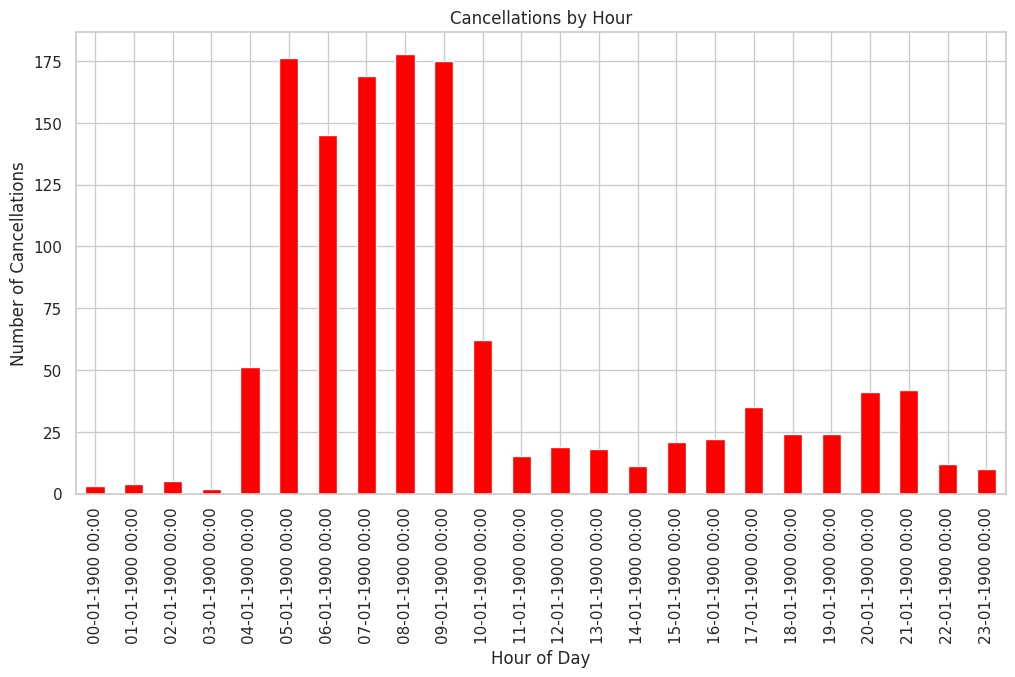

In [ ]:
cancelled = df[df['Status'] == 'Cancelled']

# Check if there are any cancellations
if not cancelled.empty:
    cancelled['Request hour'].value_counts().sort_index().plot(kind='bar', color='red')
    plt.title("Cancellations by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Cancellations")
    plt.show()
else:
    print("No cancellation records found in the dataset.")

**Trips completed by pickup:**

In [ ]:
df[df['Status'] == 'Trip Completed'].groupby('Pickup point').size()

,0
Pickup point,
Airport,1327
City,1504


**Percentage of Completed vs Cancelled vs No Cars Available:**

In [ ]:
(df['Status'].value_counts(normalize=True) * 100).round(2)

,proportion
Status,
Trip Completed,41.97
No Cars Available,39.29
Cancelled,18.74


**Trips with Missing Drop Timestamp:**

In [ ]:
df[df['Drop timestamp'].isnull()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Date,Request hour,Day,Drop timestamp,Date.1,Hour,Day.1,Status.1,Count,Pickup Point,Count.1
2831,2905,City,1.0,Cancelled,13-07-2016 06:08,13-07-2016 00:00,06-01-1900 00:00,Wednesday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07,14-07-2016 00:00,17-01-1900 00:00,Thursday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51,14-07-2016 00:00,20-01-1900 00:00,Thursday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12,15-07-2016 00:00,10-01-1900 00:00,Friday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
2835,2347,Airport,2.0,Cancelled,12-07-2016 19:14,12-07-2016 00:00,19-01-1900 00:00,Tuesday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49,15-07-2016 00:00,23-01-1900 00:00,Friday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50,15-07-2016 00:00,23-01-1900 00:00,Friday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52,15-07-2016 00:00,23-01-1900 00:00,Friday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54,15-07-2016 00:00,23-01-1900 00:00,Friday,NaN,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Load your dataset (adjust the path if needed)
# df = pd.read_csv("your_data.csv")

# Convert timestamps to datetime format (dayfirst = True since format is DD-MM-YYYY)
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Calculate trip duration
df['Trip duration'] = df['Drop timestamp'] - df['Request timestamp']

# Optionally: convert duration to minutes
df['Trip duration (min)'] = df['Trip duration'].dt.total_seconds() / 60

# View sample
df[['Request timestamp', 'Drop timestamp', 'Trip duration', 'Trip duration (min)']].head()


,Request timestamp,Drop timestamp,Trip duration,Trip duration (min)
0,2016-07-11 11:51:00,2016-07-11 13:00:00,0 days 01:09:00,69.0
1,2016-07-11 17:57:00,2016-07-11 18:47:00,0 days 00:50:00,50.0
2,2016-07-12 09:17:00,2016-07-12 09:58:00,0 days 00:41:00,41.0
3,2016-07-12 21:08:00,2016-07-12 22:03:00,0 days 00:55:00,55.0
4,2016-07-13 08:33:00,2016-07-13 09:25:00,0 days 00:52:00,52.0


**Average Trip Duration by Pickup Point:**

In [ ]:
df['Trip duration (mins)'] = df['Trip duration'].dt.total_seconds() / 60
df.groupby('Pickup point')['Trip duration (mins)'].mean()

,Trip duration (mins)
Pickup point,
Airport,52.241145
City,52.561835


**Failed Requests (Cancelled + No Cars Available) per Hour:**

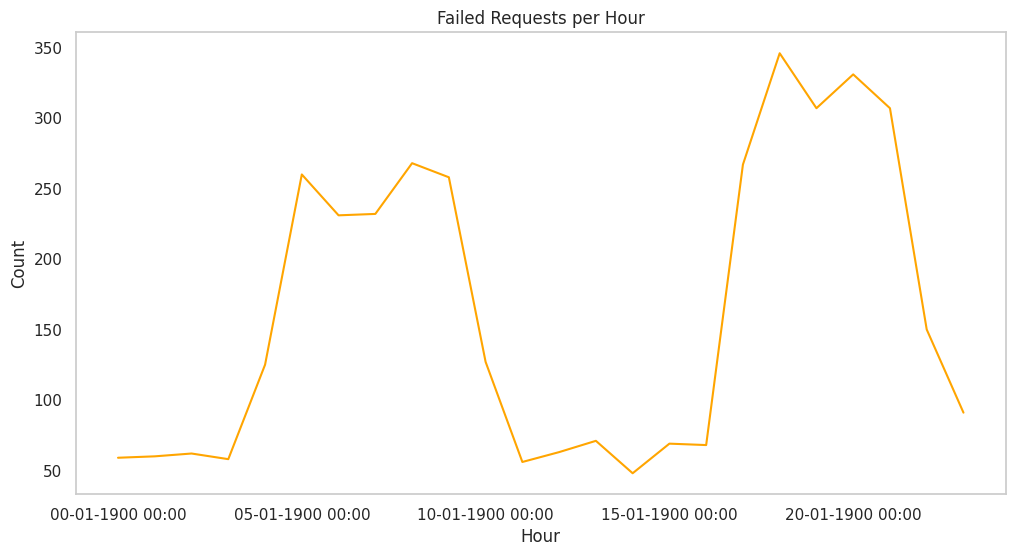

In [ ]:
failed = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]
failed['Request hour'].value_counts().sort_index().plot(kind='line', color='orange')
plt.title("Failed Requests per Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.grid()
plt.show()

**Heatmap of Requests by Hour & Pickup Point:**

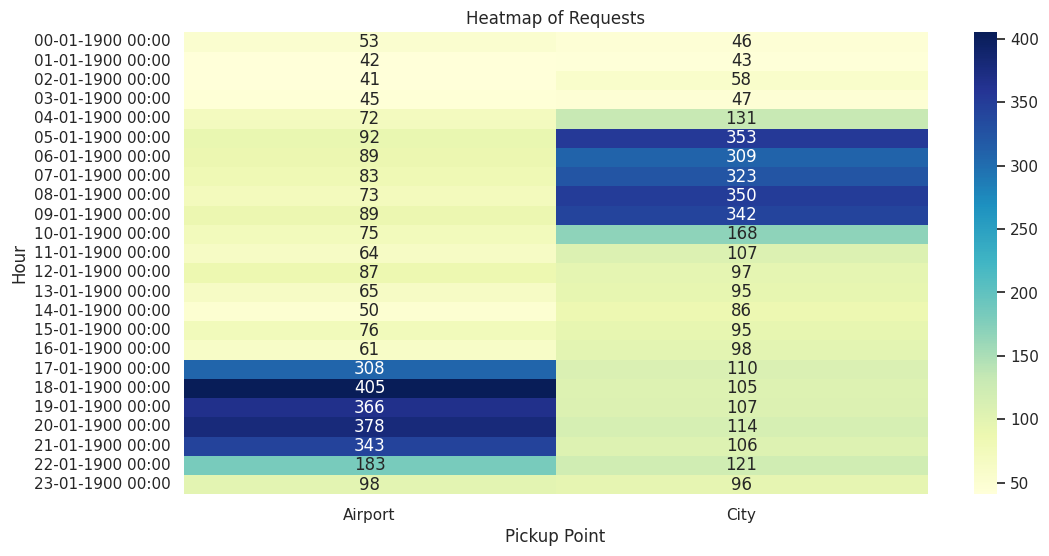

In [ ]:
import seaborn as sns
heatmap_data = df.groupby(['Request hour', 'Pickup point']).size().unstack()
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Requests")
plt.xlabel("Pickup Point")
plt.ylabel("Hour")
plt.show()

**Count of Requests by Day:**

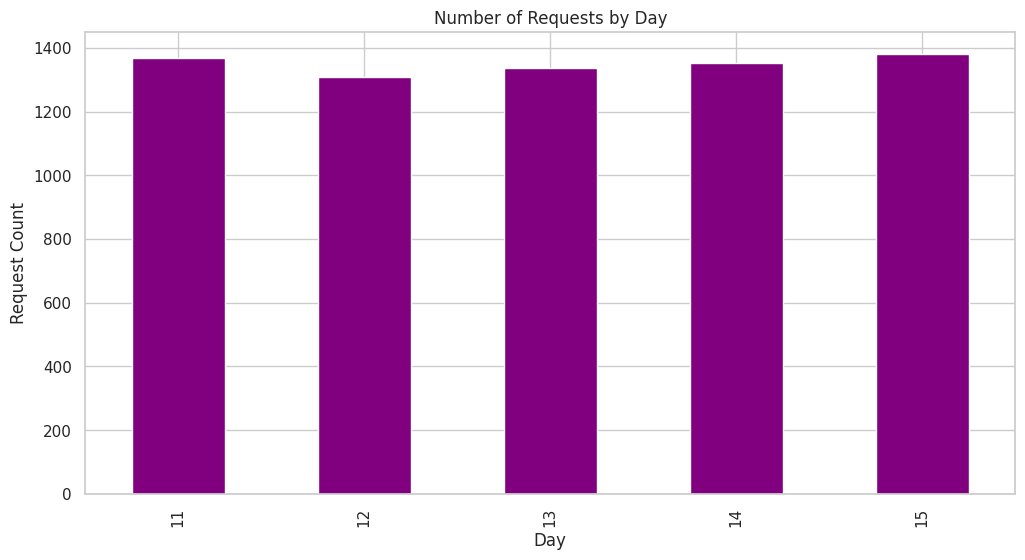

In [ ]:
df['Request Day'] = df['Request timestamp'].dt.day
df['Request Day'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Number of Requests by Day")
plt.xlabel("Day")
plt.ylabel("Request Count")
plt.show()

**Completed Trip Share by Hour:**

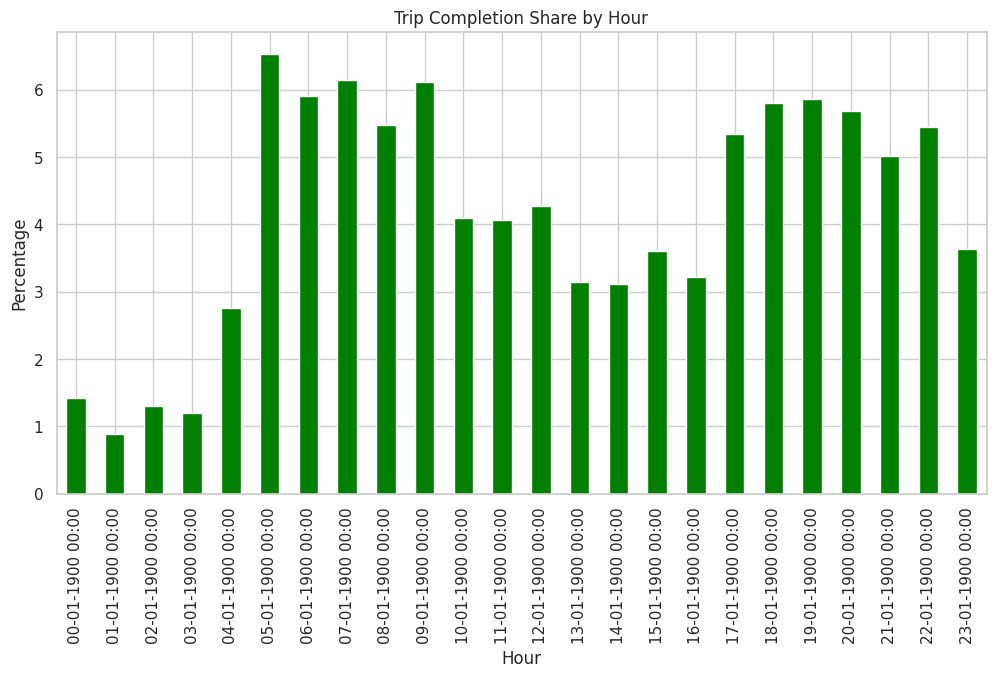

In [ ]:
completed_by_hour = df[df['Status'] == 'Trip Completed']['Request hour'].value_counts(normalize=True) * 100
completed_by_hour.sort_index().plot(kind='bar', color='green')
plt.title("Trip Completion Share by Hour")
plt.xlabel("Hour")
plt.ylabel("Percentage")
plt.show()

# **SQL:**

**Upload and load dataset:**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Uber Request Data.csv to Uber Request Data (2).csv


**Load into a DataFrame:**

In [ ]:
import pandas as pd

df = pd.read_csv("Uber Request Data.csv")
df.head()  # preview the first few rows

,Request id,Pickup point,Driver id,Status,Request timestamp,Date,Request hour,Day,Drop timestamp,Date.1,Hour,Day.1,Status.1,Count,Pickup Point,Count.1
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 00:00,11-01-1900 00:00,Monday,11-07-2016 13:00,11-07-2016 00:00,00-01-1900 13:00,Monday,Trip Completed,2831.0,Airport,3238.0
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 00:00,17-01-1900 00:00,Monday,11-07-2016 18:47,11-07-2016 00:00,00-01-1900 18:47,Monday,Cancelled,1264.0,City,3507.0
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 00:00,09-01-1900 00:00,Tuesday,12-07-2016 09:58,12-07-2016 00:00,00-01-1900 09:58,Tuesday,No Cars Available,2650.0,NaN,NaN
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 00:00,21-01-1900 00:00,Tuesday,12-07-2016 22:03,12-07-2016 00:00,00-01-1900 22:03,Tuesday,NaN,NaN,NaN,NaN
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 00:00,08-01-1900 00:00,Wednesday,13-07-2016 09:25,13-07-2016 00:00,00-01-1900 09:25,Wednesday,NaN,NaN,NaN,NaN


In [ ]:
import sqlite3

In [ ]:
# Create a connection to a temporary in-memory SQLite database
conn = sqlite3.connect(':memory:')

In [ ]:
print(df.columns)

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Date', 'Request hour', 'Day', 'Drop timestamp',
       'Date.1', 'Hour', 'Day.1', 'Status.1', 'Count', 'Pickup Point',
       'Count.1'],
      dtype='object')


In [ ]:
# Strip whitespace, lowercase all names for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)

Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'date', 'request_hour', 'day', 'drop_timestamp',
       'date.1', 'hour', 'day.1', 'status.1', 'count', 'pickup_point',
       'count.1'],
      dtype='object')


**Remove duplicate names:**

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]
print(df.columns)

Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'date', 'request_hour', 'day', 'drop_timestamp',
       'date.1', 'hour', 'day.1', 'status.1', 'count', 'count.1'],
      dtype='object')


In [ ]:
df.to_sql('uber_data', conn, index=False, if_exists='replace')

6745

**All pickup points**

In [ ]:
query = "SELECT DISTINCT pickup_point FROM uber_data"
result = pd.read_sql(query, conn)
result

,pickup_point
0,Airport
1,City


from matplotlib import pyplot as plt
import seaborn as sns
result.groupby('pickup_point').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Requests by status**

In [ ]:
query = """
SELECT `Status`, COUNT(*) as Request_Count
FROM uber_data
GROUP BY `Status`
ORDER BY Request_Count DESC
"""
pd.read_sql(query, conn)

,status,Request_Count
0,Trip Completed,2831
1,No Cars Available,2650
2,Cancelled,1264


from matplotlib import pyplot as plt
_df_0['Request_Count'].plot(kind='hist', bins=20, title='Request_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Request_Count'].plot(kind='line', figsize=(8, 4), title='Request_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Request_Count', y='status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Total number of requests**

In [ ]:
query = """
SELECT COUNT(*) AS total_requests FROM uber_data;
"""
pd.read_sql(query, conn)


,total_requests
0,6745


**Nuber of requests per pickup point**

In [ ]:
query = """
SELECT pickup_point, COUNT(*) AS total_requests
FROM uber_data
GROUP BY pickup_point
ORDER BY total_requests DESC
"""
pd.read_sql(query, conn)

,pickup_point,total_requests
0,City,3507
1,Airport,3238


from matplotlib import pyplot as plt
_df_4['total_requests'].plot(kind='hist', bins=20, title='total_requests')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('pickup_point').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['total_requests'].plot(kind='line', figsize=(8, 4), title='total_requests')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['pickup_point'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='total_requests', y='pickup_point', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Count of completed trips**

In [ ]:
query = """
SELECT COUNT(*) AS completed_trips
FROM uber_data
WHERE status = 'Trip Completed'
"""
pd.read_sql(query, conn)

,completed_trips
0,2831


**Number of cancelled trips by pickup**

In [ ]:
query = """
SELECT pickup_point, COUNT(*) AS cancellations
FROM uber_data
WHERE status = 'Cancelled'
GROUP BY pickup_point
ORDER BY cancellations DESC
"""
pd.read_sql(query, conn)


,pickup_point,cancellations
0,City,1066
1,Airport,198


**Requests made ineach hour**

In [ ]:
query = """
SELECT STRFTIME('%H', request_timestamp) AS hour, COUNT(*) AS request_count
FROM uber_data
GROUP BY hour
ORDER BY hour
"""
pd.read_sql(query, conn)

,hour,request_count
0,None,3914
1,None,3
2,None,2
3,None,3
4,None,3
...,...,...
1146,None,1
1147,None,1
1148,None,1
1149,None,4


**Percentage between completed VS cancelled requests**

In [ ]:
query = """
SELECT status, ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM uber_data), 2) AS percentage
FROM uber_data
GROUP BY status
"""
pd.read_sql(query, conn)

,status,percentage
0,Cancelled,18.74
1,No Cars Available,39.29
2,Trip Completed,41.97


**Number of requests without driver (status = No Cars Available) by pickup point**

In [ ]:
query = """
SELECT pickup_point, COUNT(*) AS no_car_requests
FROM uber_data
WHERE status = 'No Cars Available'
GROUP BY pickup_point
"""
pd.read_sql(query, conn)

,pickup_point,no_car_requests
0,Airport,1713
1,City,937


**Average number of trips per driver (only completed trips)**

In [ ]:
query = """
SELECT ROUND(COUNT(*) * 1.0 / COUNT(DISTINCT driver_id), 2) AS avg_trips_per_driver
FROM uber_data
WHERE status = 'Trip Completed'
"""
pd.read_sql(query, conn)

,avg_trips_per_driver
0,9.44


**Count of requests grouped by pickup point and status**

In [ ]:
query = """
SELECT pickup_point, status, COUNT(*) AS count
FROM uber_data
GROUP BY pickup_point, status
ORDER BY pickup_point, count DESC
"""
pd.read_sql(query, conn)

,pickup_point,status,count
0,Airport,No Cars Available,1713
1,Airport,Trip Completed,1327
2,Airport,Cancelled,198
3,City,Trip Completed,1504
4,City,Cancelled,1066
5,City,No Cars Available,937


**Day-wise trip completion count**

In [ ]:
query = """
SELECT DATE(request_timestamp) AS date, COUNT(*) AS trips_completed
FROM uber_data
WHERE status = 'Trip Completed'
GROUP BY date
ORDER BY date
"""
pd.read_sql(query, conn)

,date,trips_completed
0,None,601
1,None,562
2,None,577
3,None,530
4,None,561


**Earliest and latest request timestamp**

In [ ]:
query = """
SELECT
    MIN(request_timestamp) AS earliest_request,
    MAX(request_timestamp) AS latest_request
FROM uber_data
"""
pd.read_sql(query, conn)

,earliest_request,latest_request
0,11-07-2016 00:00,15-07-2016 23:59


# **Conclusion:**
Through this project, we successfully analyzed Uber ride request data to uncover critical issues affecting operational performance. The data cleaning phase ensured the dataset was accurate and usable, while SQL helped extract meaningful patterns like peak request times and frequently canceled pickup points. Python was used to perform deeper exploratory analysis, revealing that a significant number of cancellations occurred during high-demand hours, particularly from specific locations like airports. The visualizations provided clear insights into the demand-supply gap and customer behavior. Overall, the project highlights key problem areas that Uber can target to improve user satisfaction, optimize driver allocation, and reduce trip cancellations, ultimately leading to a more reliable and efficient ride-hailing experience.